In [45]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

We will start comparing spacecraft from both universes with this notebook.  

In [2]:
# Read in spacecraft from Star Trek

sts = pd.read_parquet('../WPscraped/StarTrek_Spacecraft.parquet')

# Read in spacecraft classes for Star Trek to add to the spacecraft

stsc = pd.read_parquet('../WPscraped/StarTrek_Spacecraft_Classes.parquet')

# Read in spacecraft from Star Wars which will need to be cleaned to only spacecrafts

sws = pd.read_parquet('../WPscraped/StarWars_Vehicles.parquet')

In [3]:
# view sts
sts.info()
sts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             1443 non-null   object
 1   spacecraftClass  610 non-null    object
dtypes: object(2)
memory usage: 22.7+ KB


,name,spacecraftClass
0,042,"{'name': 'Worker bee', 'uid': 'SCMA0000226396'}"
1,208,"{'name': 'Jumpship', 'uid': 'SCMA0000175103'}"
2,313-C,None
3,5,None
4,ATW-11,"{'name': 'UFP-02 type', 'uid': 'SCMA0000276004'}"


In [4]:
# view stsc
stsc.info()
stsc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           727 non-null    object 
 1   numberOfDecks  33 non-null     float64
 2   warpCapable    727 non-null    bool   
 3   species        412 non-null    object 
dtypes: bool(1), float64(1), object(2)
memory usage: 17.9+ KB


,name,numberOfDecks,warpCapable,species
0,Abronian ship,NaN,False,"{'name': 'Abronian', 'uid': 'SPMA0000274634'}"
1,Academy trainer craft,NaN,False,None
2,Aeroshuttle,NaN,False,None
3,Agena target vehicle,NaN,False,None
4,Akira class,NaN,False,None


In [5]:
# view sws
sws.info()
sws.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   vehicle_name  1049 non-null   object
 1   manufacturer  1049 non-null   object
 2   model         1049 non-null   object
 3   class         1049 non-null   object
 4   length        1049 non-null   object
 5   crew          1049 non-null   object
 6   owner(s)      1049 non-null   object
 7   affiliation   1049 non-null   object
dtypes: object(8)
memory usage: 65.7+ KB


,vehicle_name,manufacturer,model,class,length,crew,owner(s),affiliation
0,"""Changeling"" Mark 71NB",Ravager Mechanics,"""Changeling"" Mark 71NB",Racing starfighter,None,2,None,"['Ace Squadron', 'Colossus resistance']"
1,125-Z treadspeeder bike,Aratech-Loratus Corporation,125-Z treadspeeder bik,Speeder,4.17 meters,1,None,"['First Order', 'Resistance']"
2,49AX3,None,Dreadnought-class heavy cruiser,Heavy cruiser,None,None,None,"['Galactic Empire', 'Alliance to Restore the R..."
3,614-AvA speeder bike,Aratech Repulsor Company,614-AvA,Speeder bike,4.4 meters,['Pilot'],None,"['Galactic Empire', 'Lothal resistance group',..."
4,712-AvA speeder bike,Aratech Repulsor Company,712-AvA,Speeder bike,None,None,None,None
5,720 light freighter,Ghtroc Industries,720,Light freighter,None,2,None,Citizens' Fleet
6,74-Z speeder bike,Aratech Repulsor Company,74-Z speeder bike,Speeder bike,3.3 meters,Pilot,None,"['Galactic Republic', 'Galactic Empire', 'Impe..."
7,773,Rothana Heavy Engineering,All Terrain Tactical Enforcer,Walker,22.02 meters,None,None,"['Galactic Republic', 'Carnivore Battalion']"
8,A-A4B truckspeeder,Trast Heavy Transports,A-A4B,['Landspeeder'],None,Pilot,None,White Worms
9,A/SF-01 B-wing starfighter,Slayn & Korpil,A/SF-01 B-wing starfighter,Heavy assault starfighter,16.9 meters,Pilot,None,"['Phoenix Cell', 'Alliance to Restore the Repu..."


We've pulled in all spacecraft and spacecraft class information for the Star Trek, and we've pulled in all vehicles for Star Wars.  We will combine the Star Trek spacecraft with the classes where applicable.  We will then attempt to isolate only the spacecraft for Star Wars.

In [6]:
# Start with renaming column names in both dataframes
sts = sts.rename(columns={'name' : 'starship_name'})
stsc = stsc.rename(columns= {'name' : 'starship_class'})

# Start by pulling class name out of dictionary in Star Trek spacecraftClass

sts['spc_updated'] = sts['spacecraftClass'].apply(lambda x: x.get('name') if isinstance(x,dict) else None)

sts.info()
sts.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   starship_name    1443 non-null   object
 1   spacecraftClass  610 non-null    object
 2   spc_updated      610 non-null    object
dtypes: object(3)
memory usage: 33.9+ KB


,starship_name,spacecraftClass,spc_updated
0,042,"{'name': 'Worker bee', 'uid': 'SCMA0000226396'}",Worker bee
1,208,"{'name': 'Jumpship', 'uid': 'SCMA0000175103'}",Jumpship
2,313-C,None,None
3,5,None,None
4,ATW-11,"{'name': 'UFP-02 type', 'uid': 'SCMA0000276004'}",UFP-02 type
5,Abaddon's space station,None,None
6,Adonis,"{'name': 'Type 6A shuttlecraft', 'uid': 'SCMA0...",Type 6A shuttlecraft
7,Aeon,None,None
8,Akritirian maximum security detention facility,None,None
9,Aldara,"{'name': 'Galor class', 'uid': 'SCMA0000002988'}",Galor class


In [7]:
# Drop spacecraftClass from sts
sts = sts[['starship_name', 'spc_updated']]

# Drop species from stsc
stsc = stsc[['starship_class', 'numberOfDecks', 'warpCapable']]

In [8]:
# Add combine sts and stsc where applicable

sts_merged = pd.merge(sts, stsc, how= 'left', left_on='spc_updated', right_on='starship_class')


In [9]:
sts_merged.info()
sts_merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 1502
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   starship_name   1503 non-null   object 
 1   spc_updated     670 non-null    object 
 2   starship_class  670 non-null    object 
 3   numberOfDecks   113 non-null    float64
 4   warpCapable     670 non-null    object 
dtypes: float64(1), object(4)
memory usage: 70.5+ KB


,starship_name,spc_updated,starship_class,numberOfDecks,warpCapable
0,042,Worker bee,Worker bee,NaN,False
1,042,Worker bee,Worker bee,NaN,False
2,208,Jumpship,Jumpship,NaN,False
3,313-C,None,NaN,NaN,NaN
4,5,None,NaN,NaN,NaN


In [10]:
# Drop duplicate rows

sts_updated = sts_merged.drop_duplicates(subset='starship_name')

In [11]:
sts_updated.head()

,starship_name,spc_updated,starship_class,numberOfDecks,warpCapable
0,042,Worker bee,Worker bee,NaN,False
2,208,Jumpship,Jumpship,NaN,False
3,313-C,None,NaN,NaN,NaN
4,5,None,NaN,NaN,NaN
5,ATW-11,UFP-02 type,UFP-02 type,NaN,False


In [12]:
# Reset index
sts_updated = sts_updated.reset_index(drop=True)

In [13]:
sts_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   starship_name   1312 non-null   object 
 1   spc_updated     527 non-null    object 
 2   starship_class  527 non-null    object 
 3   numberOfDecks   87 non-null     float64
 4   warpCapable     527 non-null    object 
dtypes: float64(1), object(4)
memory usage: 51.4+ KB


In [14]:
# find out how many classes and counts of starships there are in star trek
sts_count = sts_updated['starship_class'].value_counts()

sts_count

California class        27
Type 6A shuttlecraft    16
Excelsior class         16
Sovereign class         15
Type 7 shuttlecraft     15
                        ..
Rev-12 type              1
Ravinok type             1
Kobheerian freighter     1
Talarian warship         1
Maymora class            1
Name: starship_class, Length: 189, dtype: int64

It looks like there are 189 classes of starships in the Star Trek universe that have named ships.  The majority of those named ships are California Class, followed by smaller shuttlecraft.

In [85]:
sws.head()

,vehicle_name,manufacturer,model,class,length,crew,owner(s),affiliation
0,"""Changeling"" Mark 71NB",Ravager Mechanics,"""Changeling"" Mark 71NB",Racing starfighter,None,2,None,"['Ace Squadron', 'Colossus resistance']"
1,125-Z treadspeeder bike,Aratech-Loratus Corporation,125-Z treadspeeder bik,Speeder,4.17 meters,1,None,"['First Order', 'Resistance']"
2,49AX3,None,Dreadnought-class heavy cruiser,Heavy cruiser,None,None,None,"['Galactic Empire', 'Alliance to Restore the R..."
3,614-AvA speeder bike,Aratech Repulsor Company,614-AvA,Speeder bike,4.4 meters,['Pilot'],None,"['Galactic Empire', 'Lothal resistance group',..."
4,712-AvA speeder bike,Aratech Repulsor Company,712-AvA,Speeder bike,None,None,None,None


In [86]:
swscount = sws['class'].value_counts()
swscount

Starfighter                               103
Star Destroyer                             82
Shuttle                                    62
Frigate                                    49
Transport                                  41
                                         ... 
Purgill-class Star Cruiser                  1
Drydock                                     1
Warship                                     1
['Armored transport', 'Repulsorcraft']      1
['Repulsorcraft']                           1
Name: class, Length: 240, dtype: int64

In [113]:
# Let's start compiling and pulling out only spacecraft in star wars vehicles

sws_1 = sws[sws['class'].str.contains('Speeder|speeder|Walker|walker|Submarine|submarine|Tank|tank|Landspeeder|landspeeder|Podracer|podracer|Skiff|skiff|Repulsorcraft|repulsorcraft') == False]

sws_1.info()
sws_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 1048
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   vehicle_name  904 non-null    object
 1   manufacturer  904 non-null    object
 2   model         904 non-null    object
 3   class         904 non-null    object
 4   length        904 non-null    object
 5   crew          904 non-null    object
 6   owner(s)      904 non-null    object
 7   affiliation   904 non-null    object
dtypes: object(8)
memory usage: 63.6+ KB


,vehicle_name,manufacturer,model,class,length,crew,owner(s),affiliation
0,"""Changeling"" Mark 71NB",Ravager Mechanics,"""Changeling"" Mark 71NB",Racing starfighter,None,2,None,"['Ace Squadron', 'Colossus resistance']"
2,49AX3,None,Dreadnought-class heavy cruiser,Heavy cruiser,None,None,None,"['Galactic Empire', 'Alliance to Restore the R..."
5,720 light freighter,Ghtroc Industries,720,Light freighter,None,2,None,Citizens' Fleet
9,A/SF-01 B-wing starfighter,Slayn & Korpil,A/SF-01 B-wing starfighter,Heavy assault starfighter,16.9 meters,Pilot,None,"['Phoenix Cell', 'Alliance to Restore the Repu..."
10,AA-9 Freighter-Liner,Botajef Shipyards,AA-9 Freighter-Liner,Freighter,390 meters,None,None,"['Galactic Republic', 'Grand Army of the Repub..."


In [18]:
# now let's get an updated count

swscount2 = sws_1['class'].value_counts()

swscount2

Starfighter                          103
Star Destroyer                        82
Shuttle                               62
Frigate                               49
Transport                             41
                                    ... 
['Shuttle']                            1
['Pursuit vessel', 'Starfighter']      1
['Bulk freighter']                     1
Swoop bike                             1
['Racing', 'starfighter']              1
Name: class, Length: 193, dtype: int64

Let's take a look at how many classes each group has.

In [88]:
# Star Trek # of classes

sts_count.info()

# Star Wars # of classes

swscount2.info()

<class 'pandas.core.series.Series'>
Index: 189 entries, California class to Maymora class
Series name: starship_class
Non-Null Count  Dtype
--------------  -----
189 non-null    int64
dtypes: int64(1)
memory usage: 7.0+ KB
<class 'pandas.core.series.Series'>
Index: 193 entries, Starfighter to ['Racing', 'starfighter']
Series name: class
Non-Null Count  Dtype
--------------  -----
193 non-null    int64
dtypes: int64(1)
memory usage: 7.1+ KB


Star Trek has 189 classes and Star Wars has 193.  Let's see if we can get breakdowns for top 10's

In [89]:
# Star Trek top 10 spacecraft
st_10 = sts_count.head(10)

# Star Wars top 10 spacecraft
sw_10 = swscount2.head(10)

print(st_10)
print(sw_10)

California class        27
Type 6A shuttlecraft    16
Excelsior class         16
Sovereign class         15
Type 7 shuttlecraft     15
Class C shuttlecraft    14
Type 15 shuttlepod      13
Reliant class           11
Type 6 shuttlecraft     10
Constitution class      10
Name: starship_class, dtype: int64
Starfighter       103
Star Destroyer     82
Shuttle            62
Frigate            49
Transport          41
Freighter          37
Corvette           36
Light cruiser      33
Star Cruiser       32
Cruiser            28
Name: class, dtype: int64


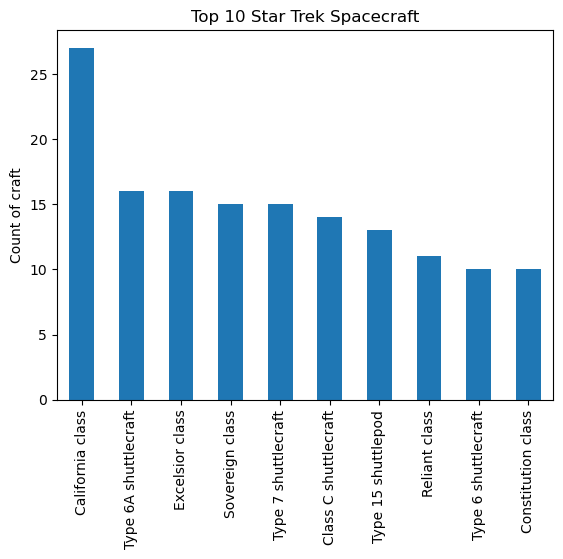

In [21]:
# Create bar chart for count of spacecraft classes Star Trek
st_10.plot(kind='bar')
plt.ylabel('Count of craft')
plt.title('Top 10 Star Trek Spacecraft')
plt.show()

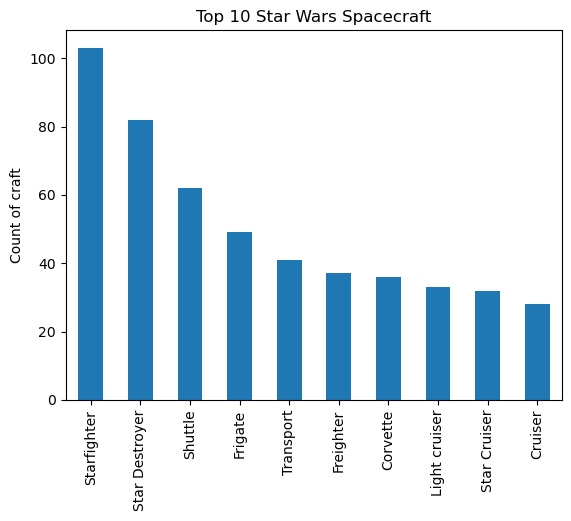

In [22]:
# Create a bar chart for count of spacecraft for Star Wars
sw_10.plot(kind='bar')
plt.ylabel('Count of craft')
plt.title('Top 10 Star Wars Spacecraft')
plt.show()

The most common Star Trek class of spacecraft tend to be a class of large spacecraft, while the most promenient Star Wars spacecraft tend to be the smaller individual starfighters.

In [104]:
# sts_updated and sws_1

sts_updated.info()
sws_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   starship_name   1312 non-null   object 
 1   spc_updated     527 non-null    object 
 2   starship_class  527 non-null    object 
 3   numberOfDecks   87 non-null     float64
 4   warpCapable     527 non-null    object 
dtypes: float64(1), object(4)
memory usage: 51.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 1048
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   vehicle_name  898 non-null    object
 1   manufacturer  898 non-null    object
 2   model         898 non-null    object
 3   class         898 non-null    object
 4   length        898 non-null    object
 5   crew          898 non-null    object
 6   owner(s)      898 non-null    object
 7   affiliation   898 non-null    object
d

In [29]:
# star trek spacecraft that have values in size 
st_deck = sts_updated['numberOfDecks'].value_counts()
st_deck.info()
st_deck.head(14)

<class 'pandas.core.series.Series'>
Float64Index: 14 entries, 34.0 to 11.0
Series name: numberOfDecks
Non-Null Count  Dtype
--------------  -----
14 non-null     int64
dtypes: int64(1)
memory usage: 224.0 bytes


34.0    16
2.0     11
22.0    11
4.0     10
13.0     8
7.0      5
5.0      5
42.0     5
8.0      4
18.0     3
15.0     3
16.0     3
3.0      2
11.0     1
Name: numberOfDecks, dtype: int64

In [35]:
# Star Trek sizes

# Average
st_deck_avg = sts_updated['numberOfDecks'].mean()
print(f'The average number of decks is {st_deck_avg} in Star Trek')

# Largest 
st_deck_large = sts_updated['numberOfDecks'].max()
print(f'The largest number of decks is {st_deck_large} in Star Trek')

# Smallest
st_deck_small = sts_updated['numberOfDecks'].min()
print(f'The smallest number of decks is {st_deck_small} in Star Trek')

The average number of decks is 16.298850574712645 in Star Trek
The largest number of decks is 42.0 in Star Trek
The smallest number of decks is 2.0 in Star Trek


87 Star Wars ships have sizes.  The sizes range from 2-42 decks.  Star Wars has 203 ships with sizes.  They are in length and not deck sizes. We will attempt to create a comparison.

In [114]:
print(sws_1[sws_1['length'].str.contains('-34.75')])

Empty DataFrame
Columns: [vehicle_name, manufacturer, model, class, length, crew, owner(s), affiliation]
Index: []


In [122]:
# Create a kilometer to meter function

def convert_to_meters(x):
    if x == 'None':
        return None
    elif isinstance(x, str) and x.startswith('[') and x.endswith(']'):
        x = ast.literal_eval(x)[-1]
    elif 'dia' in x:
        x = x.replace('dia', '')
    elif 'long' in x:
        x = x.replace('long', '')
    elif '-' in x:
        x = x.replace('—','')
    if 'kilometer' in x:
        return float(x.replace('kilometers', '').replace('kilometer', '')) * 1000
    elif 'meter' in x:
        return float(x.replace('meters', '').replace('meter', ''))
    elif 'm' in x:
        return (float(x.replace('m','')))
    else:
        return float(x)

# Remove rows with "just under"
sws_1 = sws_1[~sws_1['length'].str.contains('Just under 150')]
sws_1 = sws_1[~sws_1['length'].str.contains('1250 ft')]
sws_1 = sws_1[~sws_1['length'].str.contains('ca. 300')]
sws_1 = sws_1[~sws_1['length'].str.contains('Around 50')]
sws_1 = sws_1[~sws_1['length'].str.contains('with S-foils forward')]
sws_1 = sws_1[~sws_1['length'].str.contains('500—600 ')]
sws_1 = sws_1[~sws_1['length'].str.contains('–34.75 ')]
sws_1 = sws_1[~sws_1['length'].str.contains('80 ft')]
sws_1 = sws_1[~sws_1['length'].str.contains('Around 7.5 ')]
# Run conversion
sw_length['length'] = sws_1['length'].apply(convert_to_meters)

In [126]:
# Let's group together the sizes and see how many there are
sw_sizes = sw_length['length'].value_counts()
sw_sizes.info()
sw_sizes.head()

<class 'pandas.core.series.Series'>
Float64Index: 165 entries, 600.0 to 10.38
Series name: length
Non-Null Count  Dtype
--------------  -----
165 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


600.00    60
20.00     19
300.00    14
29.67     13
5.47      12
Name: length, dtype: int64

In [141]:
# Star Wars sizes

# Average
swsize_avg = sw_length['length'].mean()
print(f'The average spaceship length is {swsize_avg} meters in Star Wars')

# Largest 
sw_large = sw_length['length'].max()
print(f'The largest spaceship length is  {sw_large} meters in Star Wars')

# Smallest
sw_small = sw_length['length'].min()
print(f'The smallest spaceship length is {sw_small} meters in Star Wars')

The average spaceship length is 233.88874626865672 meters in Star Wars
The largest spaceship length is  2915.84 meters in Star Wars
The smallest spaceship length is 0.0 meters in Star Wars
